# <center>__Assignment 4__</center>

In [24]:
"""import the necessary packages"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## __*Part 1: Data Exploration*__

Objectives

- Read in the bike_share_hour.csv data
- Convert categorical data to Pandas category dtype
- Check for missing values in the data
- Perfom descriptive analysis on numeric columns
- Implement a barplot of cnt vs season, document which season has the most bikes and which has the least
- Implemet a barplot of month vs count, document which months have the most bike rides
- Implement code to figure out which months belong to which seasons
- Implement a bar plot of weathersit vs cnt, document which weather situation has less bike rentals
- Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue, document how season and weathersit are related
- Implement a bar plot of hour vs count on weekends and holidays (when working day = 0), does the hourly trend change on weekends?

### Read in the bike_share_hour.csv data

In [2]:
"""load the data and data descritption from Github"""

! curl https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_hour.csv --output bike_share_hour.csv
! curl https://raw.githubusercontent.com/arjayit/cs4432_data/master/bike_share_Readme.txt --output bike_share_Readme.txt
bike_share = pd.read_csv('bike_share_hour.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1129k  100 1129k    0     0  3538k      0 --:--:-- --:--:-- --:--:-- 3620k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5607  100  5607    0     0  31954      0 --:--:-- --:--:-- --:--:-- 32982


In [3]:
"""print the first 5 rows of the data"""

bike_share.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
"""print the data description"""

bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Convert categorical data to Pandas category dtype

In [5]:
"""convvert categorical features to dtype category"""

# specify index (colnames) of categorical features
cat_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
# convert features
bike_share[cat_features] = bike_share[cat_features].astype('category')
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(5), float64(4), int64(7), object(1)
memory usage: 1.7+ MB


### Check for missing values in the data

In [6]:
"""print count of null values"""

bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Perform descriptive analysis on numeric columns

In [7]:
"""print descriptive statistics for numeric features"""

bike_share.agg(func=['min', 'median', 'max', 'mean', 'var', 'std', 'skew', 'kurt'])

/var/folders/s4/yckpqxmx6cnf837zqjqn_hxc0000gn/T/ipykernel_3812/2816327743.py:3: FutureWarning: ['dteday', 'season', 'holiday', 'weekday', 'workingday', 'weathersit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  bike_share.agg(func=['min', 'median', 'max', 'mean', 'var', 'std', 'skew', 'kurt'])


,instant,dteday,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
min,1.000000e+00,2011-01-01,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
median,8.690000e+03,NaN,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
max,1.737900e+04,2012-12-31,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
mean,8.690000e+03,NaN,0.502561,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
var,2.517058e+07,NaN,0.250008,11.825178,47.808998,0.037078,0.029532,0.037222,0.014967,2430.986021,22909.027999,32901.461104
std,5.017029e+03,NaN,0.500008,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
skew,0.000000e+00,NaN,-0.010243,-0.009253,-0.010680,-0.006021,-0.090429,-0.111287,0.574905,2.499237,1.557904,1.277412
kurt,-1.200000e+00,NaN,-2.000125,-1.201878,-1.198021,-0.941844,-0.845412,-0.826117,0.590820,7.571002,2.750018,1.417203


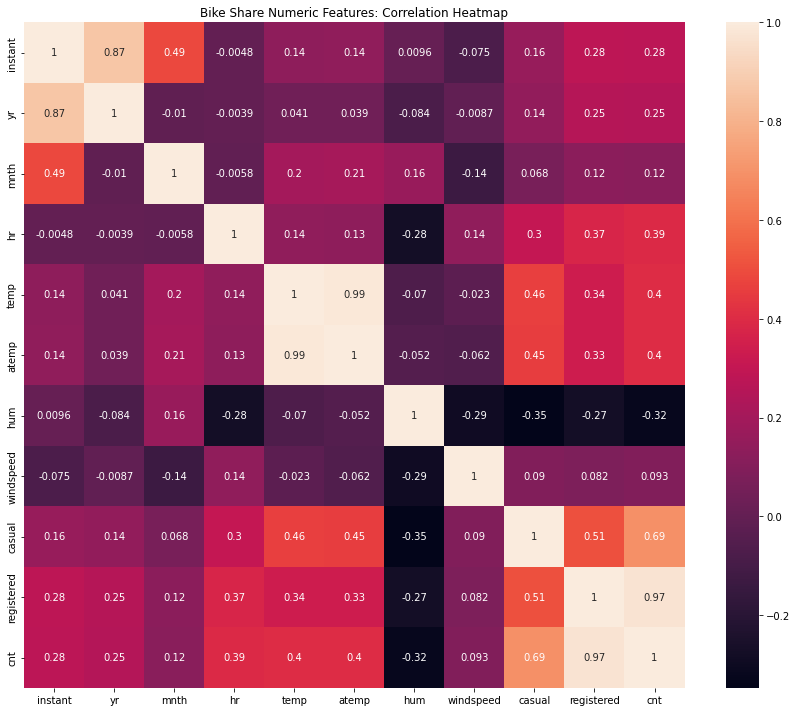

In [8]:
"""plot correlation heatmap for numeric features"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(bike_share.corr(), annot=True)
plt.title('Bike Share Numeric Features: Correlation Heatmap')
plt.tight_layout()
plt.show()

In [9]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

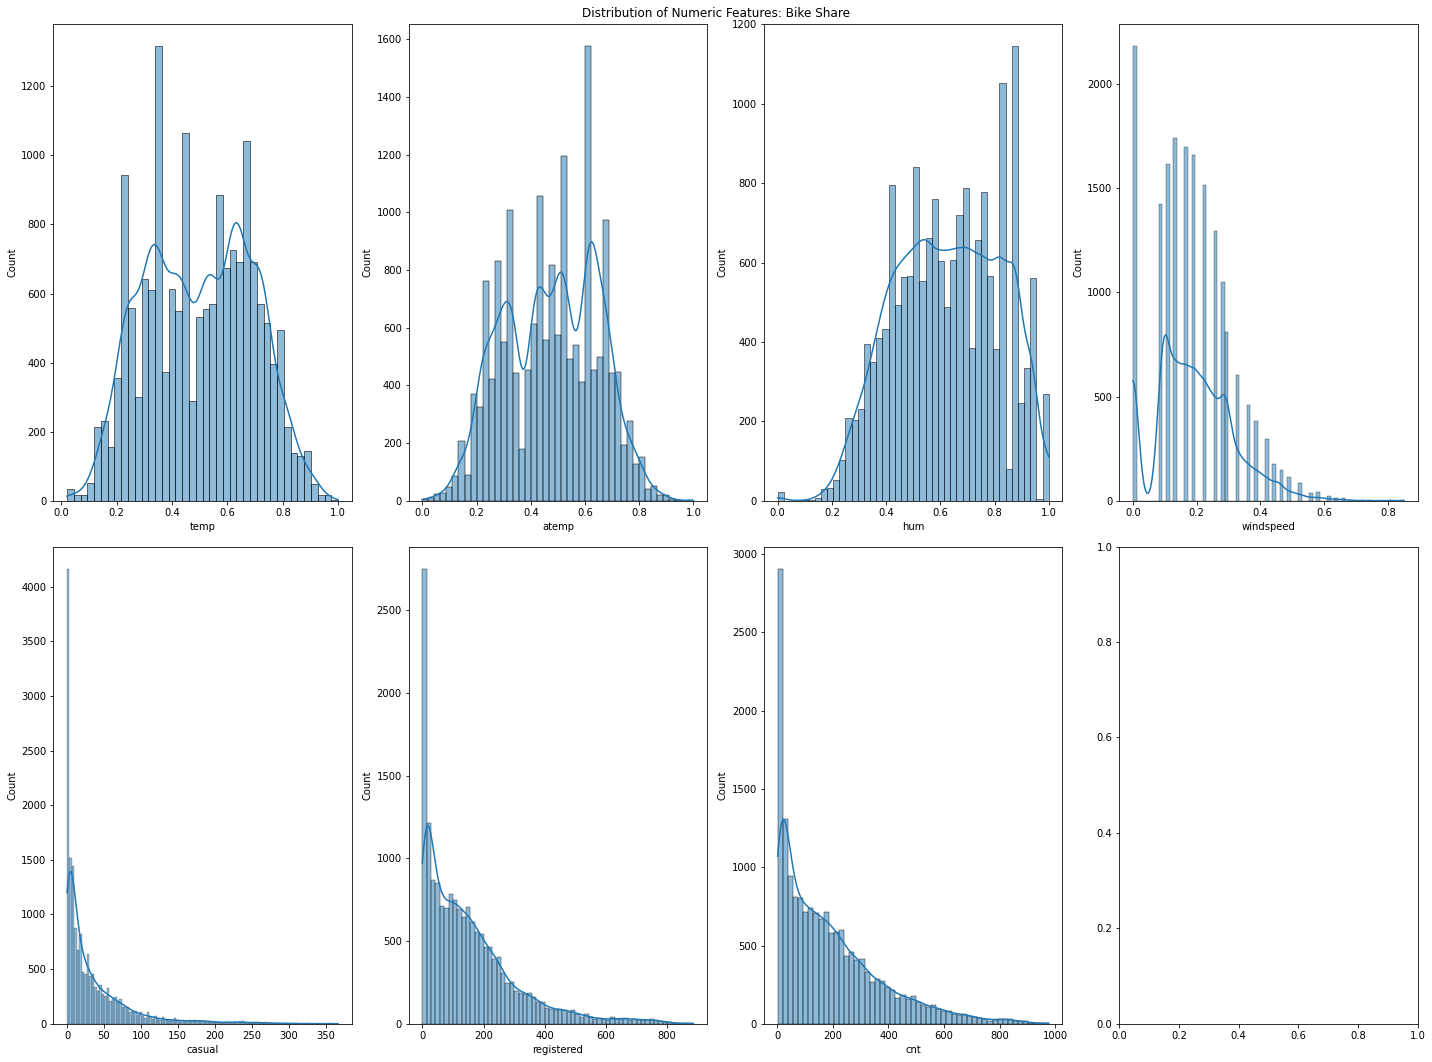

In [10]:
"""Plot data distribution (histogram) numeric features"""


fig, axs = plt.subplots(2, 4, figsize=(20, 15))
sns.histplot(data=bike_share, x="temp", kde=True, ax=axs[0, 0])
sns.histplot(data=bike_share, x="atemp", kde=True, ax=axs[0, 1])
sns.histplot(data=bike_share, x="hum", kde=True, ax=axs[0, 2])
sns.histplot(data=bike_share, x="windspeed", kde=True, ax=axs[0, 3])
sns.histplot(data=bike_share, x="casual", kde=True, ax=axs[1, 0])
sns.histplot(data=bike_share, x="registered", kde=True, ax=axs[1, 1])
sns.histplot(data=bike_share, x="cnt", kde=True, ax=axs[1, 2])
fig.suptitle('Distribution of Numeric Features: Bike Share')
plt.tight_layout()

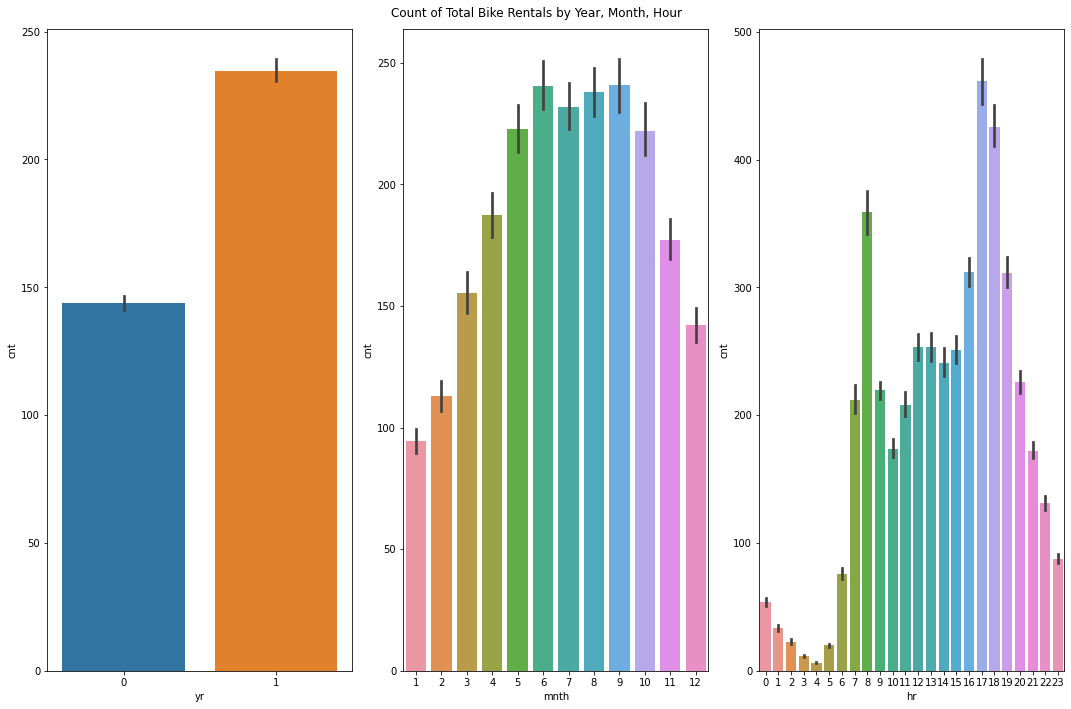

In [11]:
"""plot count of total bike rentals by month year and hour"""

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
sns.barplot(data=bike_share, x="yr", y='cnt',  ax=axs[0])
sns.barplot(data=bike_share, x="mnth", y='cnt', ax=axs[1])
sns.barplot(data=bike_share, x="hr", y='cnt', ax=axs[2])
fig.suptitle("Count of Total Bike Rentals by Year, Month, Hour")
plt.tight_layout()

### Implement a bar plot of cnt vs season, document which season has the most bikes and which has the least

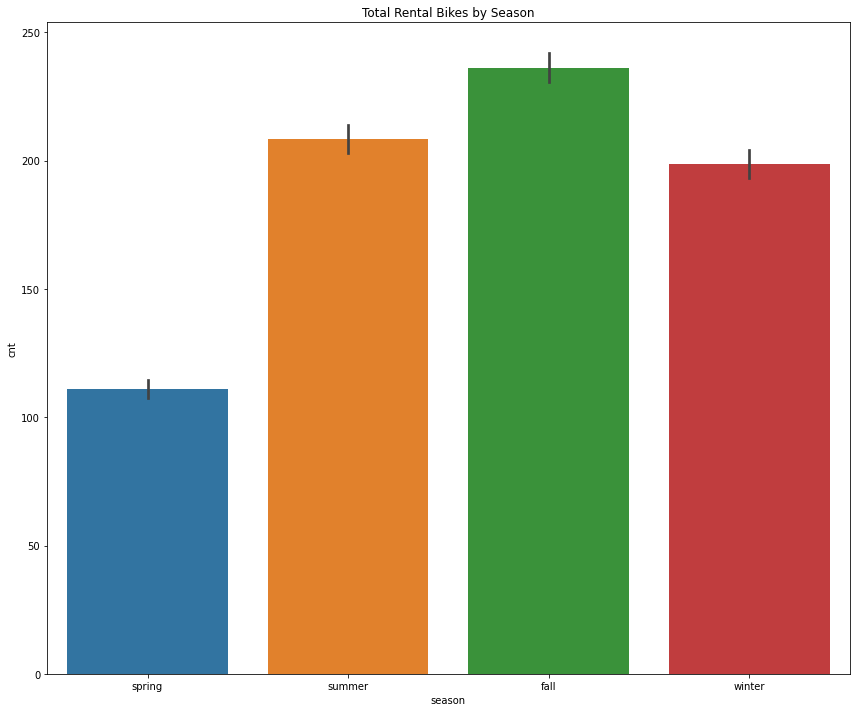

In [12]:
"""create sns barplot of cnt by season"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=bike_share, x='season', y='cnt')
ax.set_xticklabels(labels=['spring', 'summer', 'fall', 'winter'])
plt.title("Total Rental Bikes by Season")
plt.tight_layout()

The Fall season has the most total rental bikes.

### Implemet a barplot of month vs count, document which months have the most bike rides

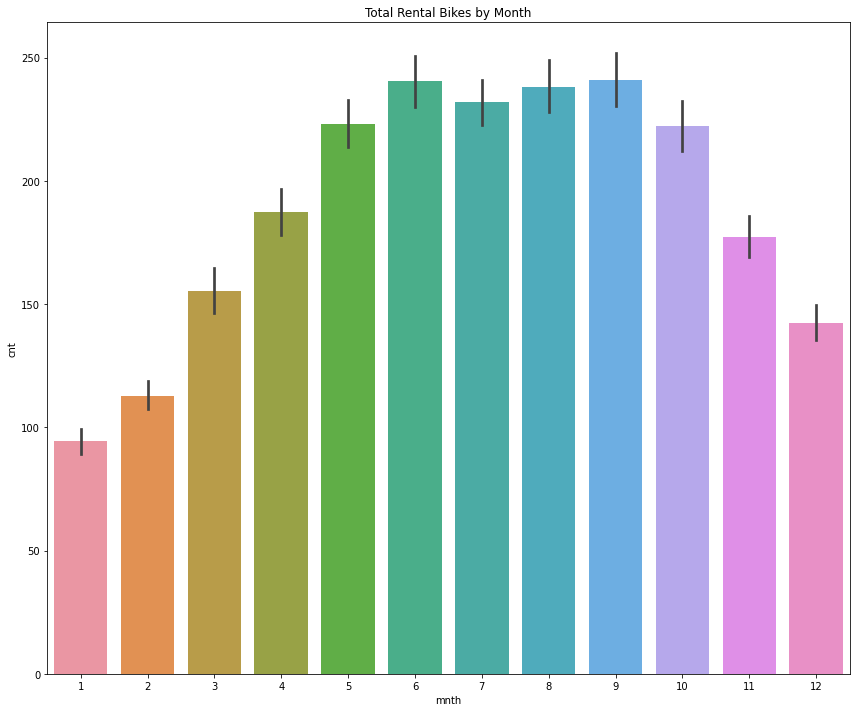

In [13]:
"""create sns barplot of cnt by month"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=bike_share, x='mnth', y='cnt')
plt.title("Total Rental Bikes by Month")
plt.tight_layout()

The majority of bike rides occur between May and November.

### Implement code to figure out which months belong to which seasons

In [14]:
season_1 = bike_share[bike_share['season'] == 1]['mnth'].unique()
season_2 = bike_share[bike_share['season'] == 2]['mnth'].unique()
season_3 = bike_share[bike_share['season'] == 3]['mnth'].unique()
season_4 = bike_share[bike_share['season'] == 4]['mnth'].unique()
season_months = pd.DataFrame({'season_1': season_1, 'season_2': season_2, 'season_3': season_3,
                              'season_4': season_4})
season_months

,season_1,season_2,season_3,season_4
0,1,3,6,9
1,2,4,7,10
2,3,5,8,11
3,12,6,9,12


### Implement a bar plot of weathersit vs cnt, document which weather situation has less bike rentals

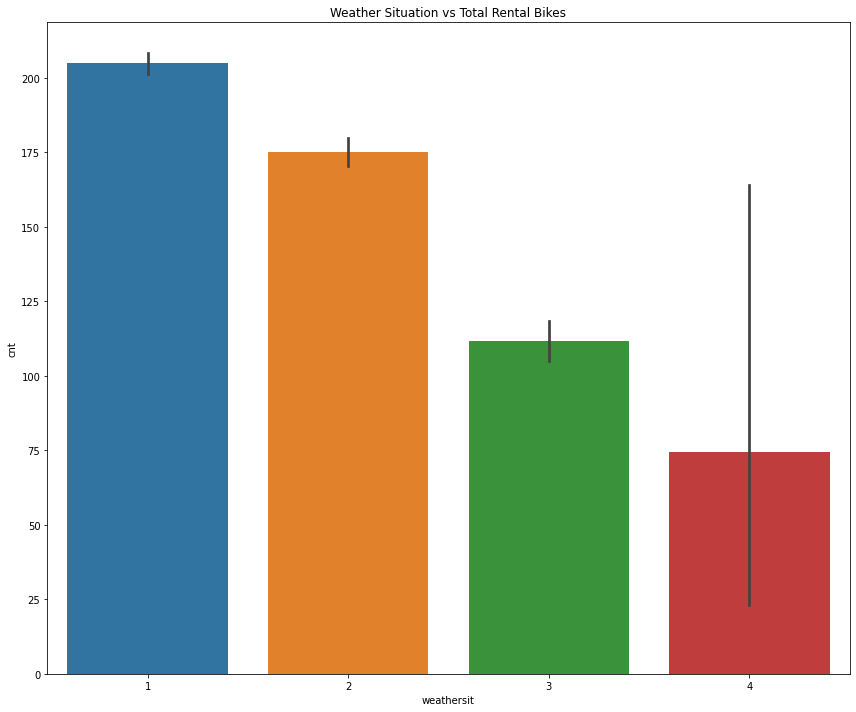

In [15]:
"""create sns barplot of weathersit vs count"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=bike_share, x='weathersit', y='cnt')
plt.title("Weather Situation vs Total Rental Bikes")
plt.tight_layout()

Weather situation (weathersit) number four has the least rental bikes. This weather situation is summarized as Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

### Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue, document how season and weathersit are related

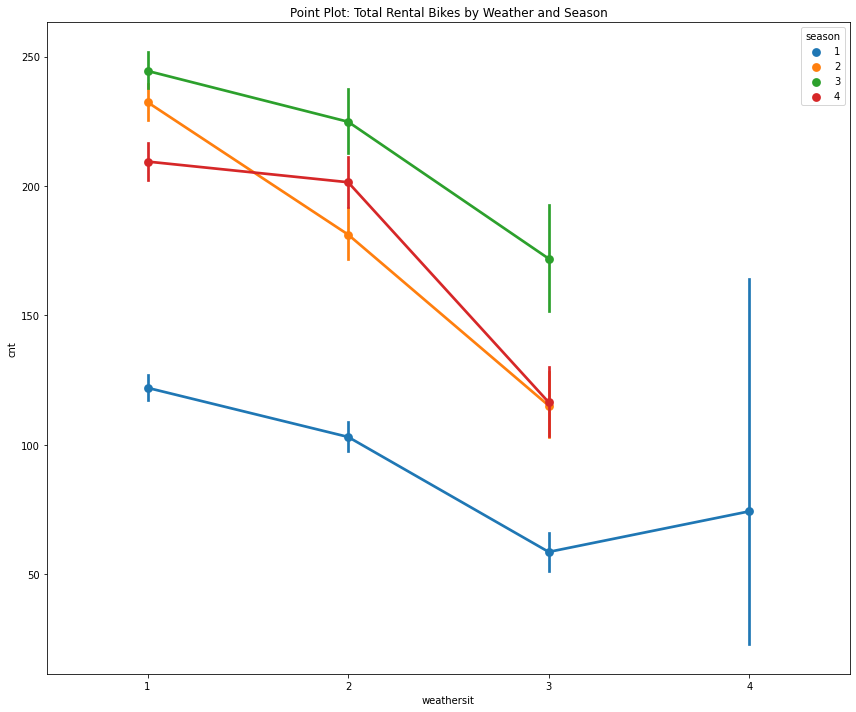

In [16]:
"""implement a pointplot of weathersit, cnt, season"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.pointplot(data=bike_share, x='weathersit', y='cnt', hue='season')
plt.title('Point Plot: Total Rental Bikes by Weather and Season')
plt.tight_layout()
plt.show()

### Implement a bar plot of hour vs count on weekends and holidays (when working day = 0), does the hourly trend change on weekends?

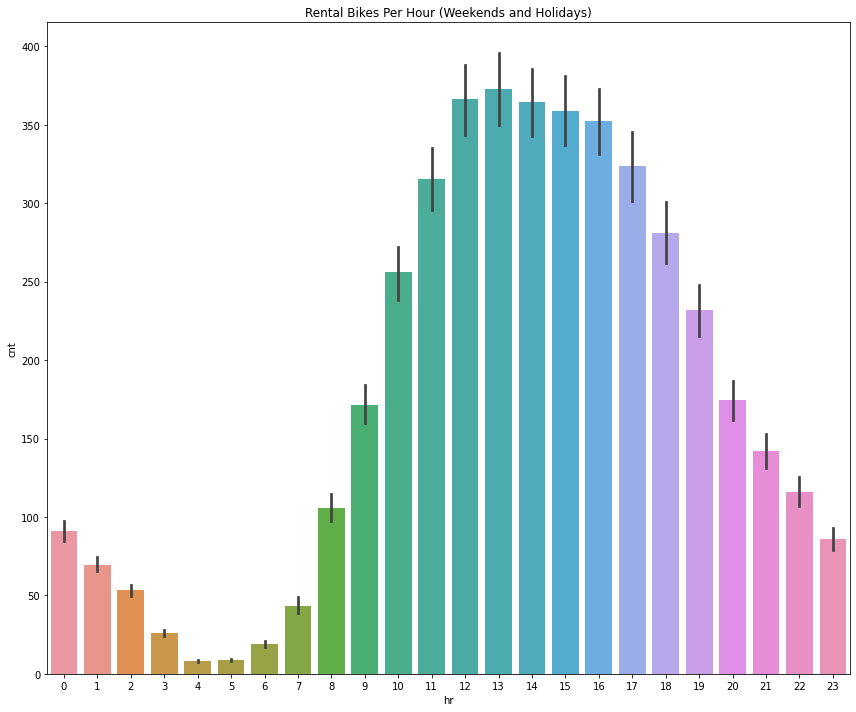

In [17]:
"""bar plot of rental bikes by hour on weekends and holidays"""

# subset the data
hours_weekends = bike_share[bike_share['workingday'] == 0].copy()
# plot the data
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=hours_weekends, x='hr', y='cnt')
plt.title('Rental Bikes Per Hour (Weekends and Holidays)')
plt.tight_layout()
plt.show()

Plotting a count of rental bikes by hour on weekends and holidays shows that the distribution of rental bikes per hour shifts so the majority of rentals occcur late morning then into the evening. A clear 8:00 a.m. spike is no longer seen indicating less people riding bikes to work.

## __*Part 2: Data Preparation*__

Objectives

- Implement and graph a correlation matrix with the remaining numeric
features. Any interesting relationships?
- Scale the numerical features using StandardScaler(), and replace the
original columns in your dataframe.
- Drop the following columns from your dataset: casual, registered, dteday,
instant.
- Implement a histogram of the count column. What can be said based on
the resulting distribution?
- Implement a train/test split with a test size of 33%.
- Implement a baseline linear regression algorithm. Use cross-validation to
output r2 and mse. Calculate RMSE base on mse. Document your scores.

### Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?

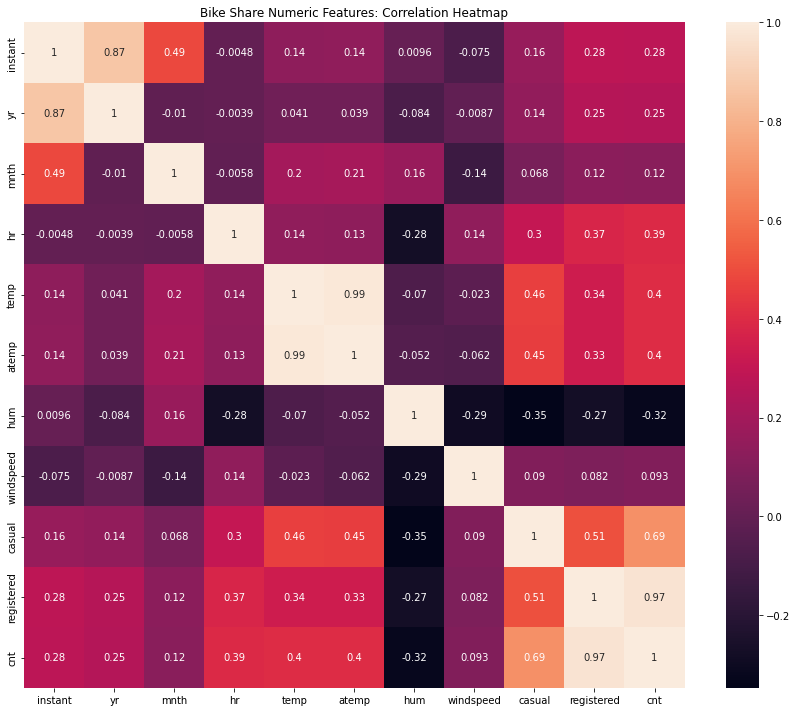

In [18]:
"""plot correlation heatmap for numeric features"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(bike_share.corr(), annot=True)
plt.title('Bike Share Numeric Features: Correlation Heatmap')
plt.tight_layout()
plt.show()

Analyzing the correlation matrix of numeric features its clear that there may be a problem with multicollinearity between (registered, count) and (atemp, temp). The same could be said for (yr, instant) but this can be disregarded since instant simply represents the record index.

### Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.

In [19]:
"""scale numeric features"""

#instantiate StandardScaler
scaler = StandardScaler()
# get numeric features index
numeric_idx = bike_share[['instant', 'yr', 'mnth', 'hr', 'temp', 'atemp',
                          'hum', 'windspeed','casual', 'registered']].columns
# scale the data
bike_share[numeric_idx] = scaler.fit_transform(bike_share[numeric_idx])

### Drop the following columns from your dataset: casual, registered, dteday, instant.

In [20]:
"""drop features from the dataset"""

bike_share.drop(columns=['casual', 'registered', 'dteday', 'instant'], inplace=True)

### Implement a histogram of the count column. What can be said based on the resulting distribution?

<AxesSubplot:xlabel='cnt', ylabel='Density'>

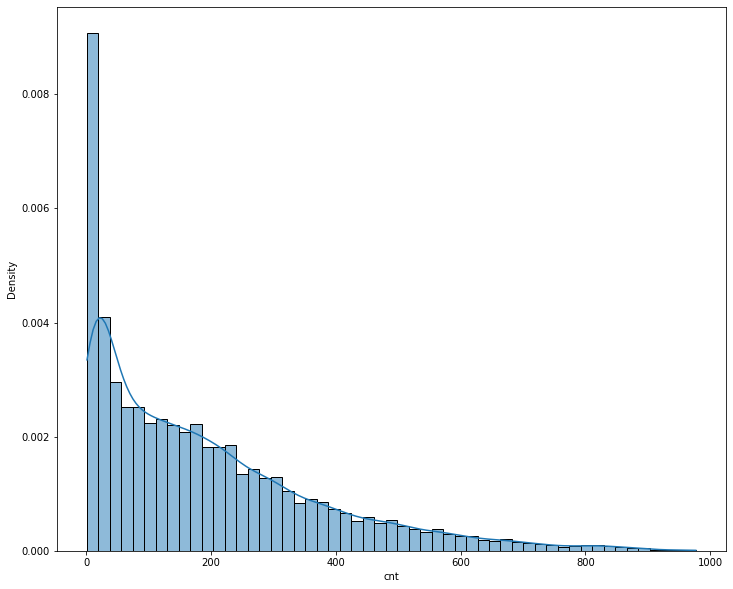

In [21]:
"""create a histogram of the count column"""

fig, ax = plt.subplots(figsize=(12, 10))
sns.histplot(data=bike_share, x='cnt', stat='density', kde=True)

The distribution of the cnt variable is right skewed. The mean is greater than the median of the variable. Conisedering a skewness of 1.277412 calculated earlier in this assignment the data could be considered extremely right skewed.

### Implement a train/test split with a test size of 33%.

In [22]:
"""split the data into training and test sets"""

X_train, X_test, y_train, y_test = train_test_split(bike_share.iloc[:,:-1], bike_share.iloc[:, -1:], test_size=0.33, random_state=14)

### Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.

In [28]:
"""
implement an sklearn LinearRegression model using cross-validation
make cross-val predictions on both the training and test sets
"""

ols = LinearRegression()
ols.fit(X_train, y_train)
train_cross_val_pred = cross_val_predict(ols, X_train, y_train, cv=10)


In [29]:
"""output mean squared error, root mean squared error, and r2 for cross val predictions made on the training set"""

# get rmse
rmse = mean_squared_error(y_train, train_cross_val_pred, squared=False)
# get mse
mse = mean_squared_error(y_train, train_cross_val_pred, squared=True)
# get r2
r2 = r2_score(y_train, train_cross_val_pred)
# print the results
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("R-squared: {:.4f}".format(r2))

Mean Squared Error: 20087.0089
Root Mean Squared Error: 141.7286
R-squared: 0.3932


## __*Part 3: Model Training*__

Objectives

- Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
- Drop the original categorical columns from your source dataset.
- Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.
- What are the new values for r2, mse, and rmse?
- Implement and score a decision tree regressor with random_state=0.
- Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.
- Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).
- Implement and score a Lasso Regressor with alpha=0.1.
- Implement and score an ElasticNet Regressor with random_state=0.
- Implement and score a Ridge Regressor with alpha=0.5.
- Implement and score a BaggingRegressor.